In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [6]:
data = pd.read_csv(r'C:\Users\Perfect\Downloads\Python_Diwali_Sales_Analysis\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv',encoding = 'unicode_escape')

In [9]:
data.shape

(11251, 15)

In [11]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [15]:
data.drop(['Status','unnamed1'],axis = 1,inplace = True)

In [16]:
data.shape

(11251, 13)

In [18]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [21]:
data.dropna(inplace = True)

In [22]:
data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [26]:
data['Amount'] = data['Amount'].astype(int)

In [28]:
data.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [29]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [38]:
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis


### Gender

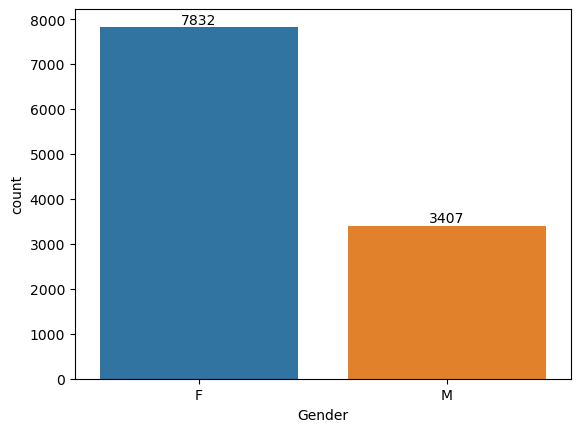

In [46]:
ax = sns.countplot(x='Gender',data = data)
for bar in ax.containers:
        ax.bar_label(bar)

In [70]:
data.groupby(['Gender'],as_index =False)['Amount'].sum().sort_values(['Amount'],ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

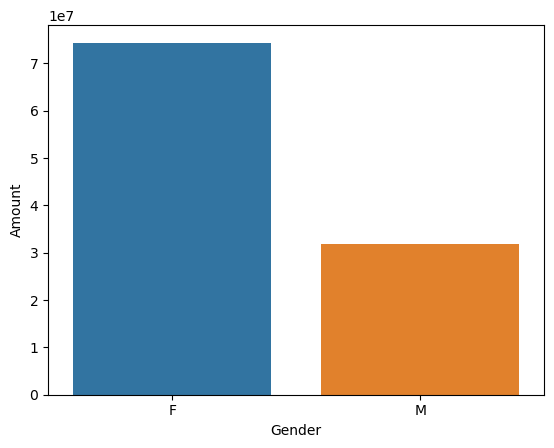

In [71]:
sales_gen = data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending = False)
sns.barplot(x='Gender',y='Amount',data = sales_gen)

#### From the bove chart we can see that females purchses more then males and also spending more monet than males.

### Age

In [72]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

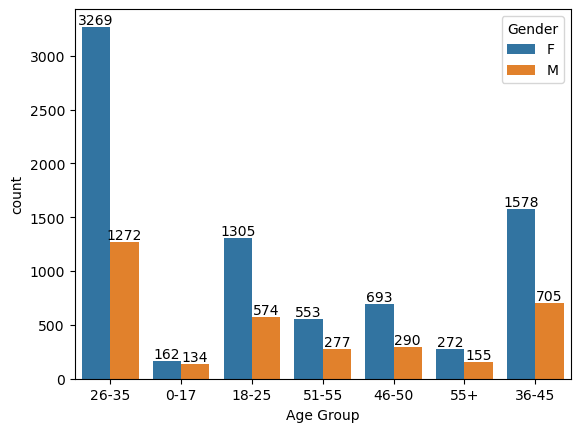

In [78]:
ax = sns.countplot(data = data,x='Age Group',hue = 'Gender')
for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Age Group', ylabel='Amount'>

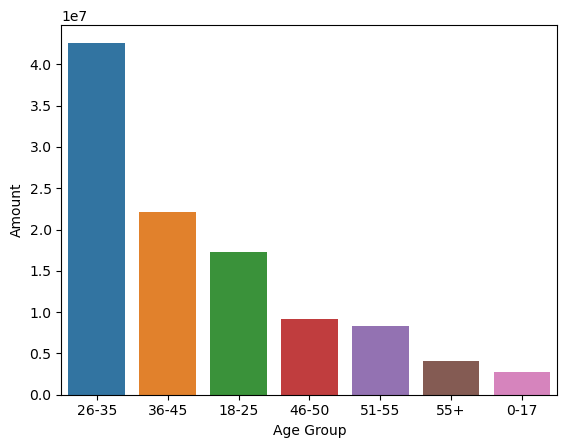

In [86]:

sales_age = data.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)


#### From above chart most of the buyers are of age group between 26-35 yrs female

### state

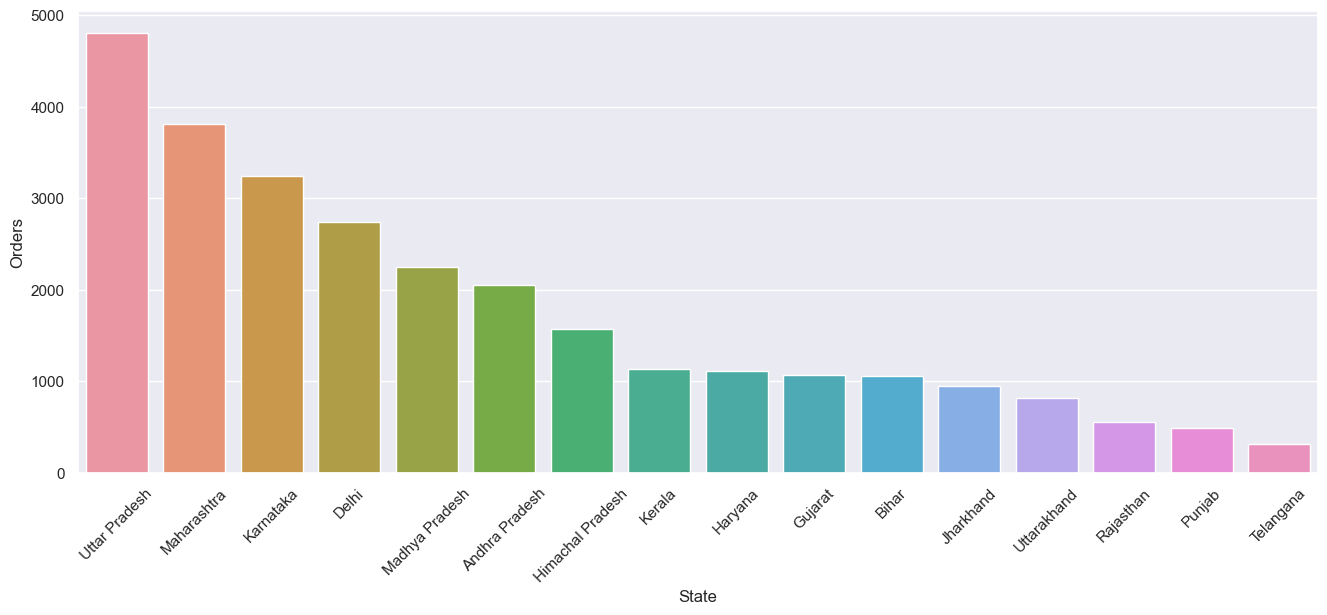

In [105]:
import matplotlib.pyplot as plt
state_orders = data.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(16,6)})
sns.barplot(x='State',y='Orders',data=state_orders)
plt.xticks(rotation=45)
plt.show()

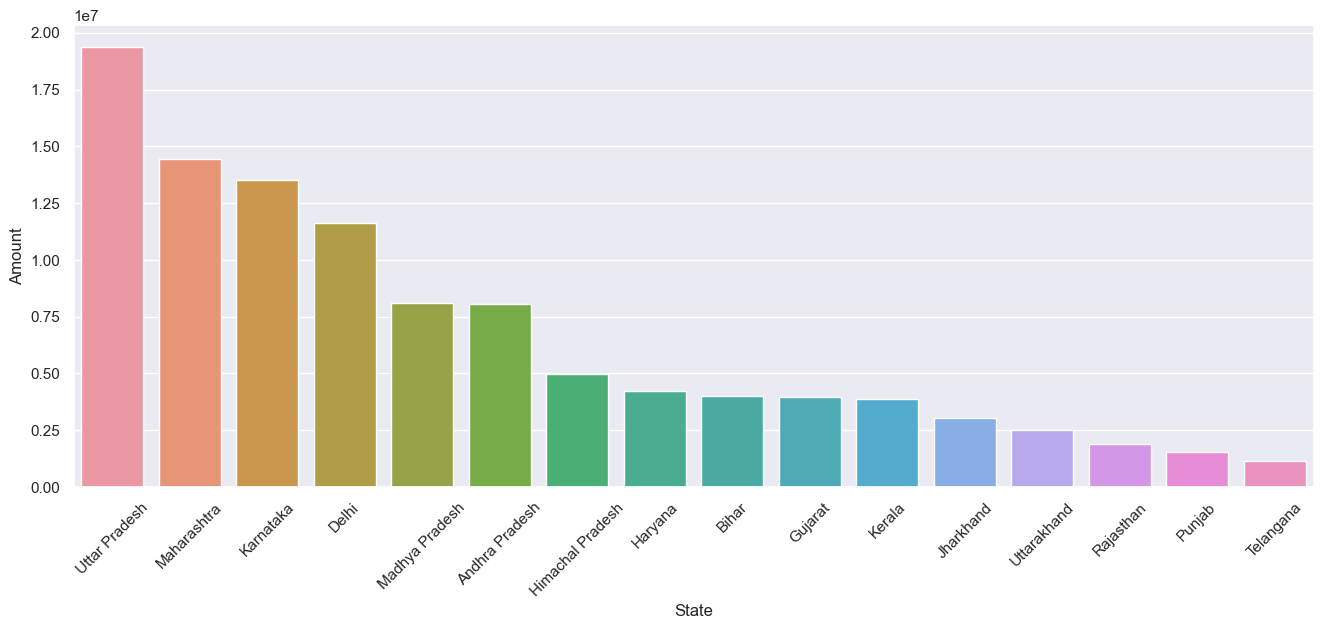

In [104]:
state_amount = data.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(16,6)})
sns.barplot(x='State',y='Amount',data=state_amount)
plt.xticks(rotation=45)
plt.show()

*Based on the visual analysis of the graphs, it is evident that Uttar Pradesh, Maharashtra, and Karnataka contribute significantly to the majority of orders and total sales/amount.*

### Marital_status

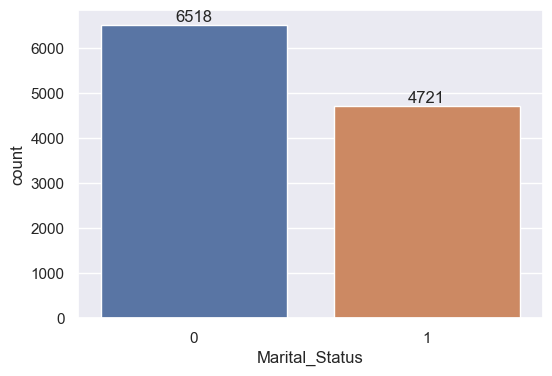

In [108]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=data,x= 'Marital_Status')
for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

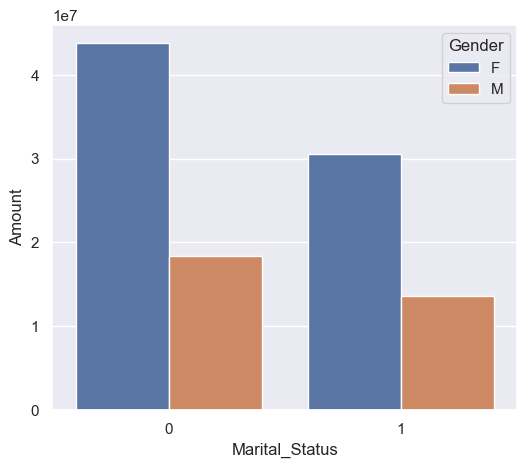

In [110]:
sales_state = data.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

*From the visual examination of the graphs, it appears that a significant portion of the buyers are married women, and this demographic exhibits substantial purchasing power*

### Occupation

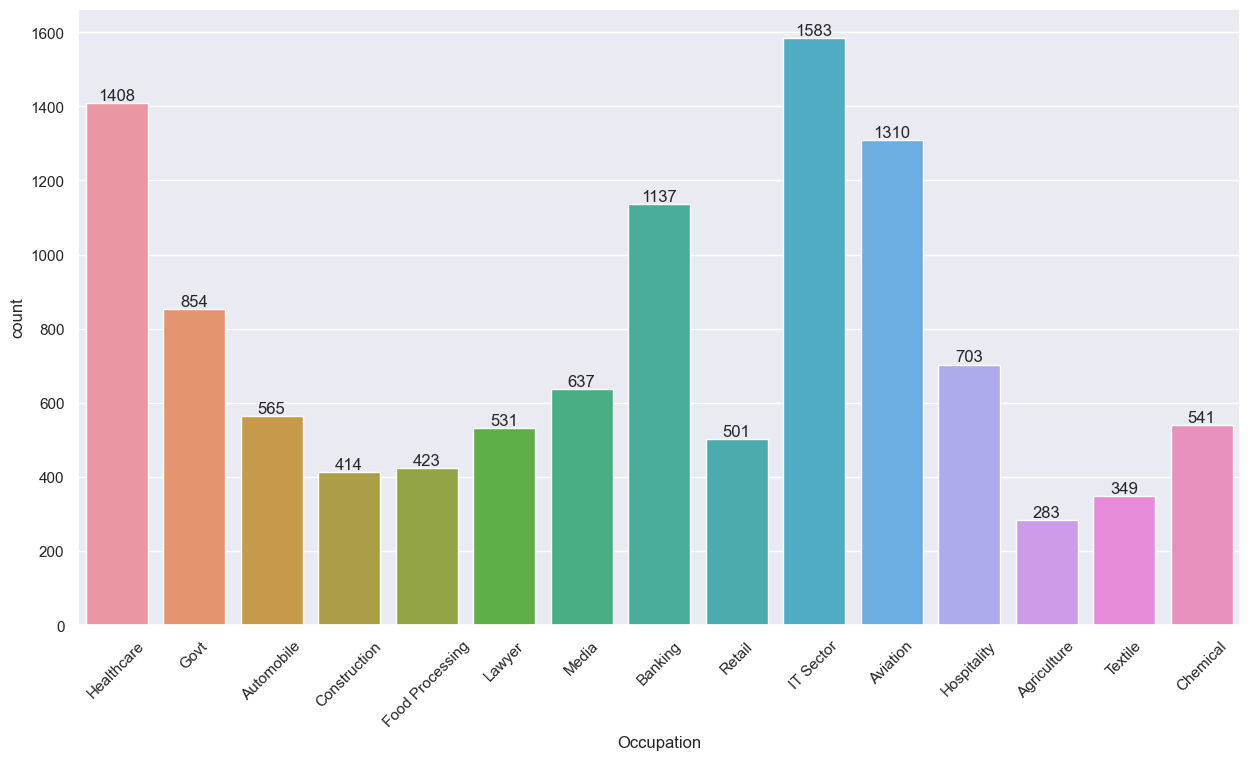

In [115]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data=data,x = 'Occupation')
for bar in ax.containers:
    ax.bar_label(bar)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Occupation', ylabel='Amount'>

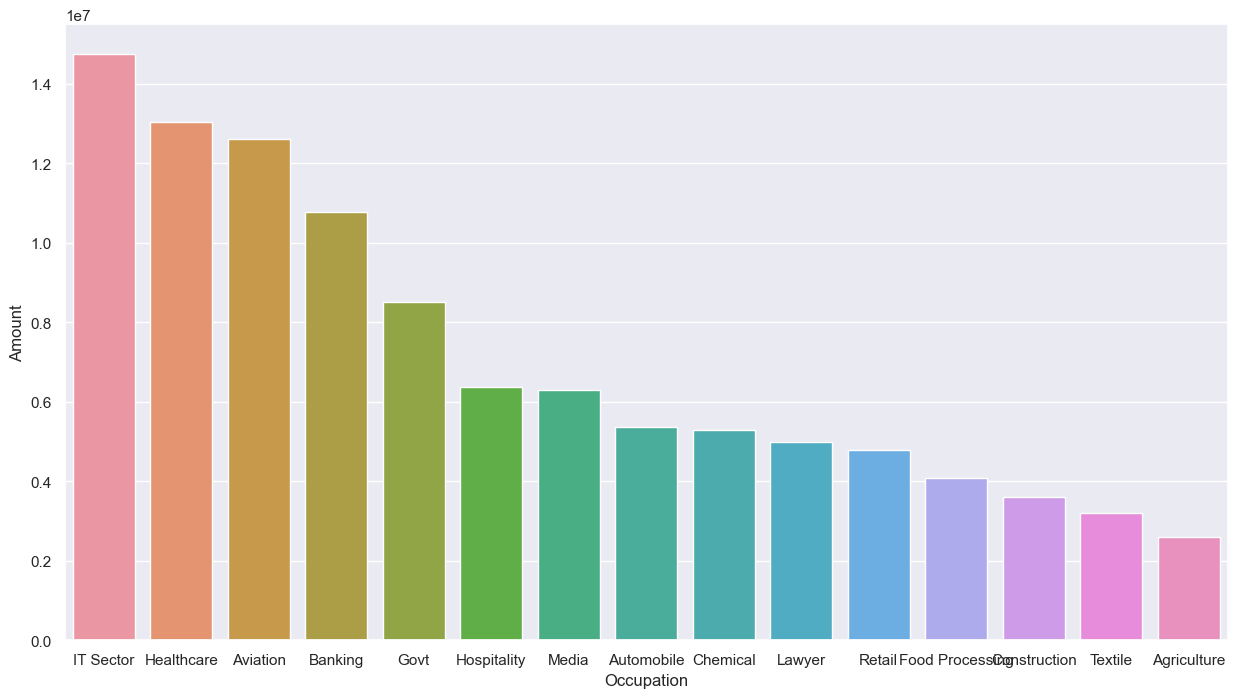

In [117]:
occup_amount = data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(data = occup_amount, x = 'Occupation',y= 'Amount')

*Analysis of the provided graphs, it is apparent that a predominant number of buyers are employed in the Information Technology (IT), Healthcare, and Aviation sectors.*

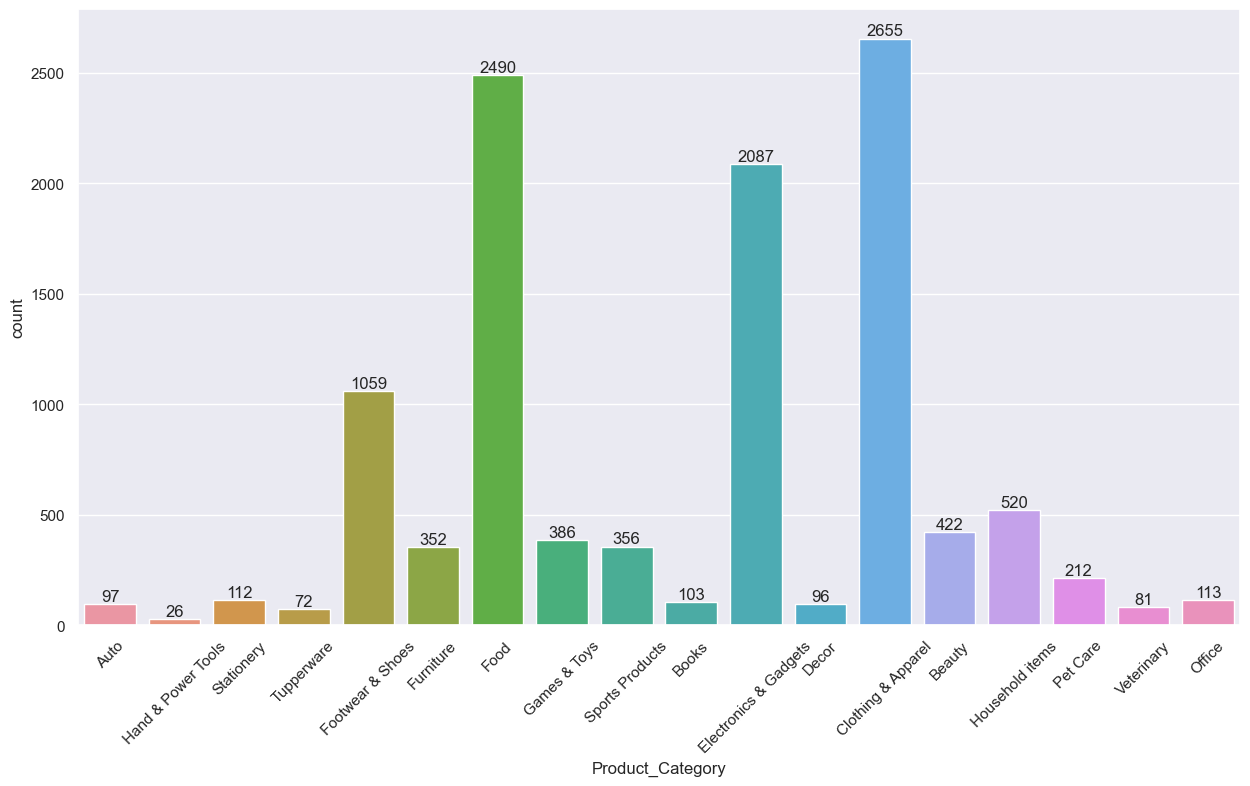

In [121]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = data, x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.show()

### Product Catagory

<Axes: xlabel='Product_Category', ylabel='Amount'>

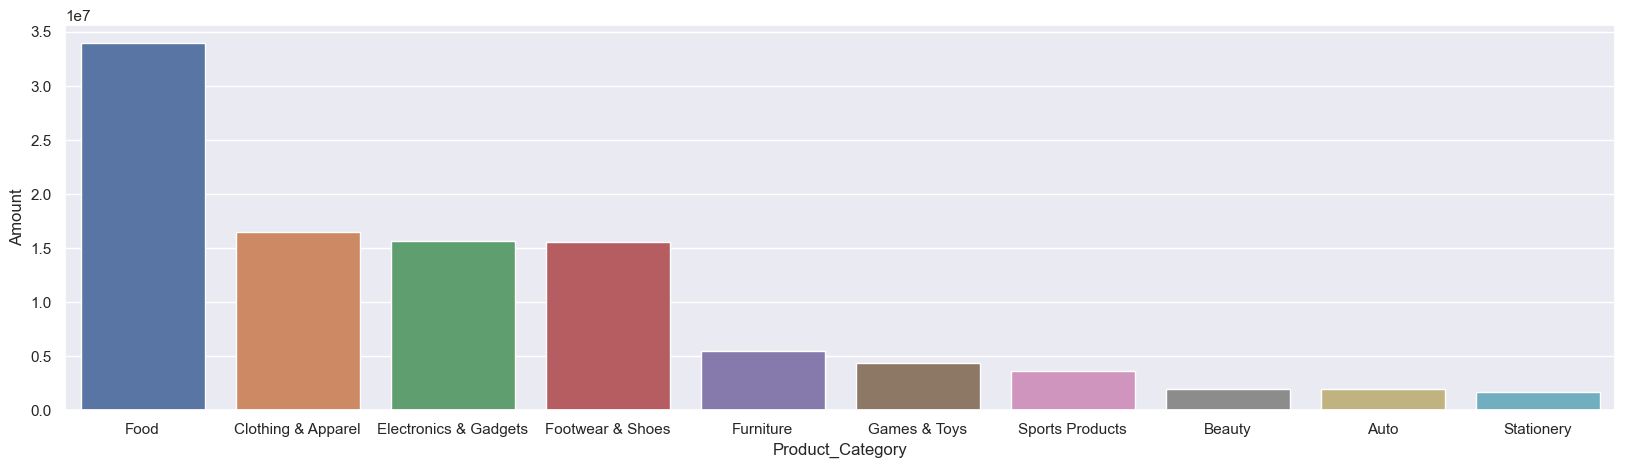

In [126]:
Product_Cat = data.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = Product_Cat, x = 'Product_Category',y= 'Amount')

*the sold products predominantly belong to the Food, Clothing, and Electronics categories..*

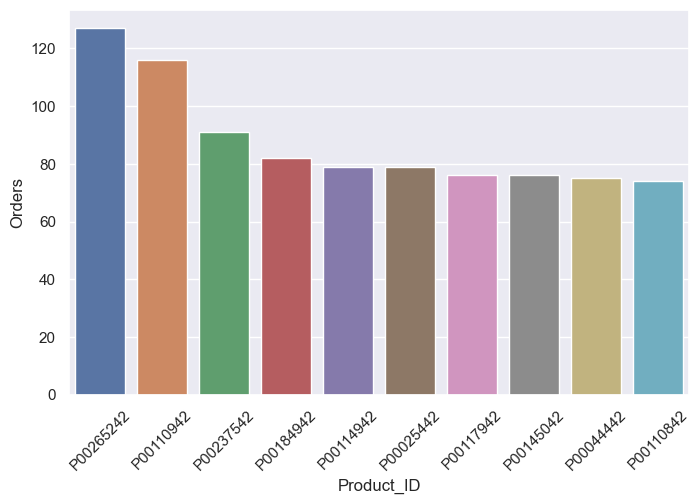

In [129]:
product_id = data.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(data = product_id, x = 'Product_ID',y= 'Orders')
plt.xticks(rotation=45)
plt.show()

#### Conclusion:

*The data suggests a notable consumer profile: married women aged 26-35 years residing in Uttar Pradesh, Maharashtra, and Karnataka and employed in the Information Technology (IT), Healthcare, and Aviation sectors. This demographic exhibits a pronounced inclination towards purchasing products from the Food, Clothing, and Electronics categories.*

*Saddam Hussain*

*saddam.analyst@gmail.com*

*Thank You!*